In [1]:
import pandas as pd,warnings,numpy as np,matplotlib.pyplot as plt,seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.datasets import load_boston,load_iris
from sklearn.tree import plot_tree
warnings.filterwarnings('ignore')

In [2]:
def Evaluate_Classifier(model,X_test,y_test):
    y_pred = model.predict(X_test)
    plot_confusion_matrix(model,X_test,y_test,display_labels=['NO','YES'],cmap=plt.cm.Blues)
    accuracy = accuracy_score(y_test,y_pred)
    print('Model Performance')
    print('Accuracy: {:.0%}'.format(accuracy))
    print(classification_report(y_pred,y_test))
    return accuracy

In [3]:
def Accuracy(model,X,y,name_accuracy):
    print('{}: {score:.2%}'.format(name_accuracy,score = model.score(X,y)))

# DATA

In [4]:
df = pd.read_csv(r"C:\Users\ADMIN\Documents\Data_Science\Data\Classified Data.csv")
df.drop(columns=df.columns[0],inplace=True)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=10)

# PARAMETERS

In [5]:
depth = [3,4,5,6,8,10,12,15]
learning_rate = [0.05,0.10,0.15,0.20,0.25,0.30]
iterations = [50,100,150,200,250,500,1000]
cat_params = {'depth':depth,'learning_rate':learning_rate,'iterations':iterations}

# BASE MODEL

In [6]:
base_model = CatBoostClassifier()
base_model.fit(X_train,y_train)

Learning rate set to 0.008847
0:	learn: 0.6819797	total: 1.05s	remaining: 17m 27s
1:	learn: 0.6720158	total: 1.06s	remaining: 8m 47s
2:	learn: 0.6620711	total: 1.06s	remaining: 5m 53s
3:	learn: 0.6524865	total: 1.07s	remaining: 4m 26s
4:	learn: 0.6426674	total: 1.18s	remaining: 3m 55s
5:	learn: 0.6343171	total: 1.19s	remaining: 3m 17s
6:	learn: 0.6250210	total: 1.2s	remaining: 2m 50s
7:	learn: 0.6163043	total: 1.21s	remaining: 2m 29s
8:	learn: 0.6070463	total: 1.21s	remaining: 2m 13s
9:	learn: 0.6014090	total: 1.29s	remaining: 2m 7s
10:	learn: 0.5928063	total: 1.29s	remaining: 1m 56s
11:	learn: 0.5843301	total: 1.3s	remaining: 1m 47s
12:	learn: 0.5742237	total: 1.31s	remaining: 1m 39s
13:	learn: 0.5669065	total: 1.39s	remaining: 1m 38s
14:	learn: 0.5582447	total: 1.4s	remaining: 1m 31s
15:	learn: 0.5495461	total: 1.41s	remaining: 1m 26s
16:	learn: 0.5409661	total: 1.42s	remaining: 1m 21s
17:	learn: 0.5341482	total: 1.5s	remaining: 1m 21s
18:	learn: 0.5264432	total: 1.51s	remaining: 1m 

165:	learn: 0.1664021	total: 6.42s	remaining: 32.2s
166:	learn: 0.1655471	total: 6.43s	remaining: 32.1s
167:	learn: 0.1648460	total: 6.53s	remaining: 32.4s
168:	learn: 0.1643880	total: 6.54s	remaining: 32.2s
169:	learn: 0.1637957	total: 6.55s	remaining: 32s
170:	learn: 0.1631739	total: 6.56s	remaining: 31.8s
171:	learn: 0.1625559	total: 6.72s	remaining: 32.4s
172:	learn: 0.1618730	total: 6.73s	remaining: 32.2s
173:	learn: 0.1611198	total: 6.75s	remaining: 32s
174:	learn: 0.1604437	total: 6.86s	remaining: 32.3s
175:	learn: 0.1599046	total: 6.87s	remaining: 32.2s
176:	learn: 0.1592218	total: 6.88s	remaining: 32s
177:	learn: 0.1587234	total: 6.89s	remaining: 31.8s
178:	learn: 0.1583116	total: 6.99s	remaining: 32.1s
179:	learn: 0.1577230	total: 7s	remaining: 31.9s
180:	learn: 0.1570222	total: 7.01s	remaining: 31.7s
181:	learn: 0.1563203	total: 7.11s	remaining: 31.9s
182:	learn: 0.1555658	total: 7.12s	remaining: 31.8s
183:	learn: 0.1551050	total: 7.12s	remaining: 31.6s
184:	learn: 0.1544868

327:	learn: 0.0993959	total: 12.3s	remaining: 25.2s
328:	learn: 0.0991817	total: 12.3s	remaining: 25.1s
329:	learn: 0.0989181	total: 12.3s	remaining: 25s
330:	learn: 0.0986487	total: 12.3s	remaining: 25s
331:	learn: 0.0984550	total: 12.4s	remaining: 25s
332:	learn: 0.0981836	total: 12.4s	remaining: 24.9s
333:	learn: 0.0979467	total: 12.5s	remaining: 24.8s
334:	learn: 0.0976271	total: 12.5s	remaining: 24.7s
335:	learn: 0.0973958	total: 12.6s	remaining: 24.8s
336:	learn: 0.0972078	total: 12.6s	remaining: 24.7s
337:	learn: 0.0969775	total: 12.6s	remaining: 24.6s
338:	learn: 0.0966339	total: 12.7s	remaining: 24.7s
339:	learn: 0.0964150	total: 12.7s	remaining: 24.6s
340:	learn: 0.0962761	total: 12.7s	remaining: 24.5s
341:	learn: 0.0959864	total: 12.7s	remaining: 24.4s
342:	learn: 0.0958073	total: 12.7s	remaining: 24.3s
343:	learn: 0.0955543	total: 12.8s	remaining: 24.4s
344:	learn: 0.0953459	total: 12.8s	remaining: 24.3s
345:	learn: 0.0949943	total: 12.8s	remaining: 24.2s
346:	learn: 0.0947

487:	learn: 0.0702307	total: 18.5s	remaining: 19.4s
488:	learn: 0.0701436	total: 18.5s	remaining: 19.4s
489:	learn: 0.0700072	total: 18.5s	remaining: 19.3s
490:	learn: 0.0698971	total: 18.5s	remaining: 19.2s
491:	learn: 0.0697610	total: 18.7s	remaining: 19.3s
492:	learn: 0.0696204	total: 18.7s	remaining: 19.2s
493:	learn: 0.0694913	total: 18.7s	remaining: 19.2s
494:	learn: 0.0694152	total: 18.9s	remaining: 19.3s
495:	learn: 0.0693438	total: 18.9s	remaining: 19.2s
496:	learn: 0.0692145	total: 18.9s	remaining: 19.1s
497:	learn: 0.0690414	total: 18.9s	remaining: 19.1s
498:	learn: 0.0688783	total: 19.1s	remaining: 19.1s
499:	learn: 0.0687647	total: 19.1s	remaining: 19.1s
500:	learn: 0.0686622	total: 19.2s	remaining: 19.1s
501:	learn: 0.0684112	total: 19.2s	remaining: 19s
502:	learn: 0.0683358	total: 19.2s	remaining: 19s
503:	learn: 0.0682900	total: 19.2s	remaining: 18.9s
504:	learn: 0.0681622	total: 19.2s	remaining: 18.8s
505:	learn: 0.0680243	total: 19.3s	remaining: 18.8s
506:	learn: 0.06

648:	learn: 0.0533383	total: 24.2s	remaining: 13.1s
649:	learn: 0.0532670	total: 24.2s	remaining: 13s
650:	learn: 0.0531909	total: 24.2s	remaining: 13s
651:	learn: 0.0530944	total: 24.4s	remaining: 13s
652:	learn: 0.0530579	total: 24.4s	remaining: 13s
653:	learn: 0.0529661	total: 24.4s	remaining: 12.9s
654:	learn: 0.0528613	total: 24.4s	remaining: 12.8s
655:	learn: 0.0528210	total: 24.5s	remaining: 12.8s
656:	learn: 0.0527597	total: 24.5s	remaining: 12.8s
657:	learn: 0.0526647	total: 24.5s	remaining: 12.7s
658:	learn: 0.0525843	total: 24.5s	remaining: 12.7s
659:	learn: 0.0525366	total: 24.5s	remaining: 12.6s
660:	learn: 0.0524496	total: 24.7s	remaining: 12.6s
661:	learn: 0.0523751	total: 24.7s	remaining: 12.6s
662:	learn: 0.0522328	total: 24.7s	remaining: 12.5s
663:	learn: 0.0521354	total: 24.9s	remaining: 12.6s
664:	learn: 0.0520374	total: 24.9s	remaining: 12.5s
665:	learn: 0.0519365	total: 24.9s	remaining: 12.5s
666:	learn: 0.0518536	total: 25s	remaining: 12.5s
667:	learn: 0.0517223	

812:	learn: 0.0427925	total: 29.7s	remaining: 6.84s
813:	learn: 0.0427025	total: 30.2s	remaining: 6.9s
814:	learn: 0.0426732	total: 30.2s	remaining: 6.86s
815:	learn: 0.0426127	total: 30.2s	remaining: 6.81s
816:	learn: 0.0425979	total: 30.2s	remaining: 6.77s
817:	learn: 0.0425565	total: 30.5s	remaining: 6.78s
818:	learn: 0.0425059	total: 30.5s	remaining: 6.74s
819:	learn: 0.0424707	total: 30.5s	remaining: 6.7s
820:	learn: 0.0423848	total: 30.5s	remaining: 6.65s
821:	learn: 0.0423200	total: 30.7s	remaining: 6.64s
822:	learn: 0.0422863	total: 30.7s	remaining: 6.6s
823:	learn: 0.0422273	total: 30.7s	remaining: 6.56s
824:	learn: 0.0421336	total: 30.7s	remaining: 6.52s
825:	learn: 0.0421174	total: 30.8s	remaining: 6.49s
826:	learn: 0.0420771	total: 30.8s	remaining: 6.45s
827:	learn: 0.0419820	total: 30.8s	remaining: 6.41s
828:	learn: 0.0419702	total: 30.9s	remaining: 6.36s
829:	learn: 0.0419210	total: 31s	remaining: 6.34s
830:	learn: 0.0419032	total: 31s	remaining: 6.3s
831:	learn: 0.041832

971:	learn: 0.0364701	total: 35.9s	remaining: 1.03s
972:	learn: 0.0364569	total: 35.9s	remaining: 997ms
973:	learn: 0.0364040	total: 35.9s	remaining: 960ms
974:	learn: 0.0363600	total: 36s	remaining: 922ms
975:	learn: 0.0363156	total: 36.1s	remaining: 887ms
976:	learn: 0.0363098	total: 36.1s	remaining: 849ms
977:	learn: 0.0362641	total: 36.1s	remaining: 812ms
978:	learn: 0.0362277	total: 36.1s	remaining: 774ms
979:	learn: 0.0362176	total: 36.2s	remaining: 739ms
980:	learn: 0.0361692	total: 36.2s	remaining: 701ms
981:	learn: 0.0361549	total: 36.2s	remaining: 664ms
982:	learn: 0.0361388	total: 36.3s	remaining: 628ms
983:	learn: 0.0360546	total: 36.3s	remaining: 591ms
984:	learn: 0.0360383	total: 36.3s	remaining: 553ms
985:	learn: 0.0360232	total: 36.3s	remaining: 516ms
986:	learn: 0.0359921	total: 36.4s	remaining: 479ms
987:	learn: 0.0359062	total: 36.5s	remaining: 443ms
988:	learn: 0.0358225	total: 36.5s	remaining: 406ms
989:	learn: 0.0357732	total: 36.5s	remaining: 369ms
990:	learn: 0.

# RandomizedSearchCV

In [7]:
def Hypertuning_rscv(model,params,n_iter,cv,X_train,y_train):
    random = RandomizedSearchCV(estimator=model, param_distributions=params, n_jobs=-1, n_iter=n_iter, cv=cv,verbose=2, random_state=42)
    random.fit(X_train,y_train)
    best_params = random.best_params_
    best_score = random.best_score_
    best_estimator = random.best_estimator_
    return best_params,best_score,best_estimator

In [8]:
best_params, best_score, best_estimator_random = Hypertuning_rscv(CatBoostClassifier(),cat_params,3,3,X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
0:	learn: 0.4511664	total: 17.8ms	remaining: 3.54s
1:	learn: 0.3290690	total: 20.6ms	remaining: 2.04s
2:	learn: 0.2586709	total: 22.6ms	remaining: 1.48s
3:	learn: 0.2266955	total: 24.5ms	remaining: 1.2s
4:	learn: 0.1938594	total: 27.4ms	remaining: 1.07s
5:	learn: 0.1724408	total: 30.1ms	remaining: 974ms
6:	learn: 0.1582146	total: 32.3ms	remaining: 889ms
7:	learn: 0.1492813	total: 34.4ms	remaining: 827ms
8:	learn: 0.1422977	total: 36.6ms	remaining: 777ms
9:	learn: 0.1345606	total: 39.6ms	remaining: 753ms
10:	learn: 0.1272467	total: 41.6ms	remaining: 715ms
11:	learn: 0.1209681	total: 43.7ms	remaining: 684ms
12:	learn: 0.1160454	total: 45.9ms	remaining: 660ms
13:	learn: 0.1102279	total: 47.8ms	remaining: 636ms
14:	learn: 0.1056516	total: 49.8ms	remaining: 614ms
15:	learn: 0.0995328	total: 51.9ms	remaining: 597ms
16:	learn: 0.0927794	total: 53.9ms	remaining: 580ms
17:	learn: 0.0879807	total: 55.9ms	remaining: 566ms
18:	learn: 0.082

180:	learn: 0.0065289	total: 677ms	remaining: 71.1ms
181:	learn: 0.0064778	total: 681ms	remaining: 67.3ms
182:	learn: 0.0063881	total: 683ms	remaining: 63.5ms
183:	learn: 0.0063881	total: 689ms	remaining: 60ms
184:	learn: 0.0063659	total: 699ms	remaining: 56.7ms
185:	learn: 0.0063011	total: 704ms	remaining: 53ms
186:	learn: 0.0062938	total: 707ms	remaining: 49.2ms
187:	learn: 0.0062938	total: 711ms	remaining: 45.4ms
188:	learn: 0.0062096	total: 719ms	remaining: 41.8ms
189:	learn: 0.0062097	total: 721ms	remaining: 38ms
190:	learn: 0.0061419	total: 724ms	remaining: 34.1ms
191:	learn: 0.0061356	total: 727ms	remaining: 30.3ms
192:	learn: 0.0060912	total: 734ms	remaining: 26.6ms
193:	learn: 0.0060224	total: 737ms	remaining: 22.8ms
194:	learn: 0.0060224	total: 741ms	remaining: 19ms
195:	learn: 0.0059924	total: 743ms	remaining: 15.2ms
196:	learn: 0.0058356	total: 746ms	remaining: 11.4ms
197:	learn: 0.0057695	total: 750ms	remaining: 7.57ms
198:	learn: 0.0057694	total: 753ms	remaining: 3.78ms
1

# GridSearchCV

In [9]:
def Hypertuning_gscv(model,params,cv,X_train,y_train):
    grid = GridSearchCV(estimator = model, param_grid = params, cv=cv, n_jobs=-1, verbose=2)
    grid.fit(X_train,y_train)
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_estimator = grid.best_estimator_
    return best_params,best_score,best_estimator

In [10]:
# best_params, best_score, best_estimator_grid = Hypertuning_gscv(CatBoostClassifier(),cat_params,3,X_train,y_train)

# Evaluation

In [11]:
Accuracy(base_model,X_train,y_train,'Train Accuracy Base Model')
Accuracy(base_model,X_test,y_test,'Test Accuracy Base Model')
print('')
Accuracy(best_estimator_random,X_train,y_train,'Train Accuracy Randomimzed')
Accuracy(best_estimator_random,X_test,y_test,'Test Accuracy Randomized')
# print('')
# Accuracy(best_estimator_grid,X_train,y_train,'Train Accuracy Grid')
# Accuracy(best_estimator_grid,X_test,y_test,'Test Accuracy Grid')

Train Accuracy Base Model: 100.00%
Test Accuracy Base Model: 94.00%

Train Accuracy Randomimzed: 100.00%
Test Accuracy Randomized: 93.33%


Model Performance
Accuracy: 94%
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       165
           1       0.95      0.92      0.93       135

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



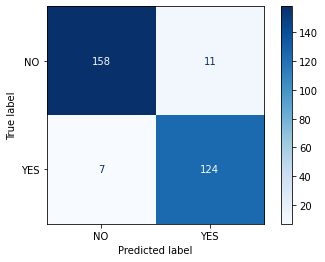

In [12]:
base_accuracy = Evaluate_Classifier(base_model,X_test,y_test)

Model Performance
Accuracy: 93%
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       165
           1       0.94      0.91      0.92       135

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



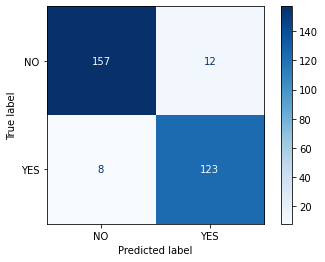

In [13]:
random_accuracy_classifier = Evaluate_Classifier(best_estimator_random,X_test,y_test)

In [14]:
print('Improvement of {:.2%}'.format((random_accuracy_classifier-base_accuracy)/base_accuracy))

Improvement of -0.71%


In [15]:
# grid_accuracy_classifier = Evaluate_Classifier(best_estimator_grid,X_test,y_test)

In [16]:
# print('Improvement of {:0.2%}'.format((grid_accuracy_classifier-base_accuracy)/base_accuracy))